In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from collections import Counter

In [3]:
dataset = pd.read_csv('datasets/petrol_consumption.csv')

In [4]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
dataset.shape

(48, 5)

In [34]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Petrol_tax'>

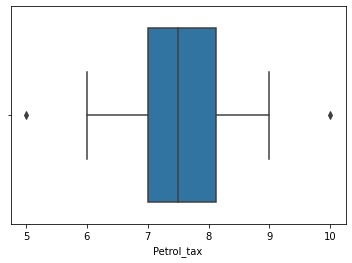

In [42]:
sns.boxplot(dataset['Petrol_tax'])

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average_income'>

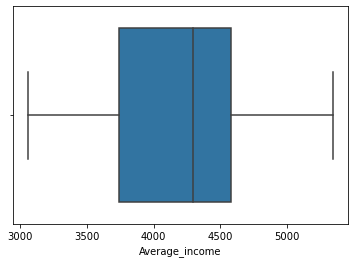

In [43]:
sns.boxplot(dataset['Average_income'])

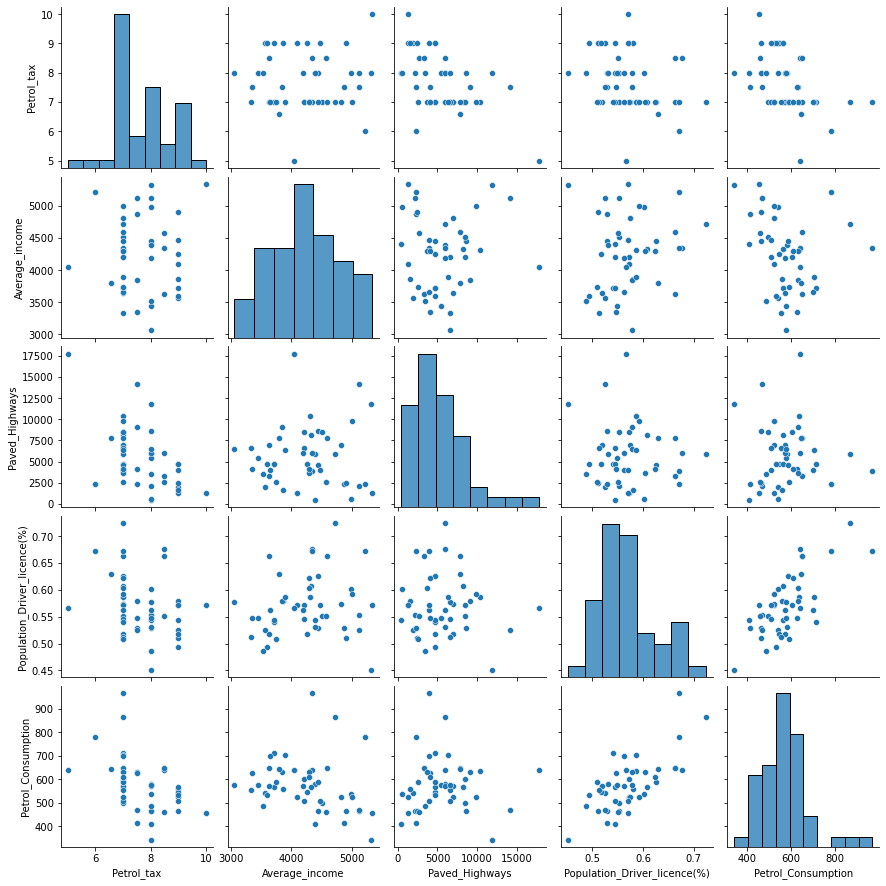

In [7]:
sns.pairplot(dataset)

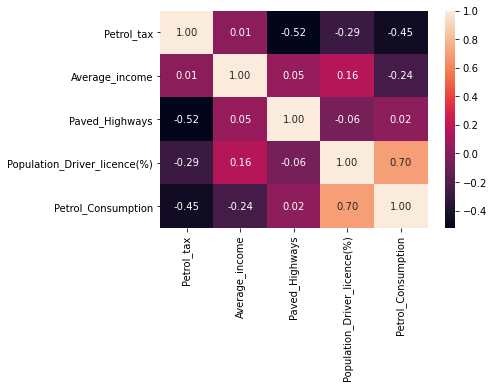

In [8]:
sns.heatmap(dataset.corr(), annot = True , fmt=".2f")
plt.show()

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population_Driver_licence(%)', ylabel='Density'>

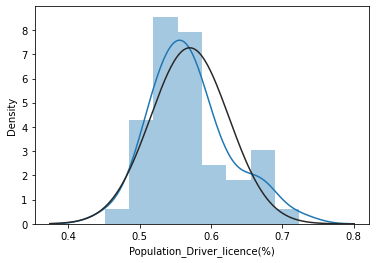

In [9]:
sns.distplot(dataset['Population_Driver_licence(%)'],fit=norm)

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average_income', ylabel='Density'>

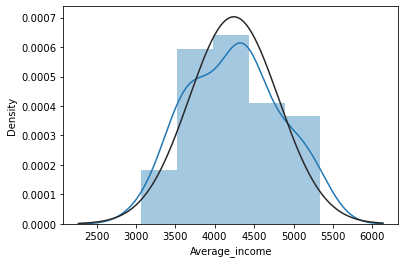

In [35]:
sns.distplot(dataset['Average_income'],fit=norm)

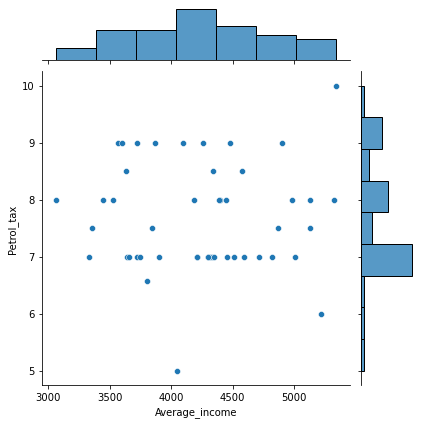

In [37]:
sns.jointplot(y='Petrol_tax',x='Average_income',data=dataset,kind='scatter')

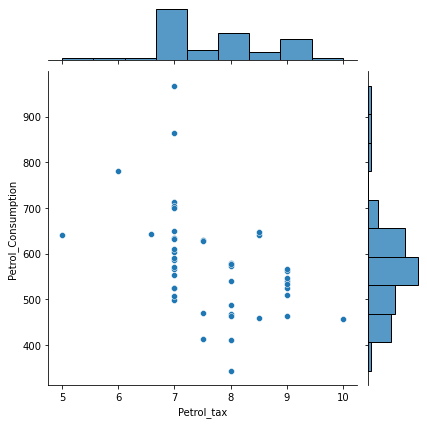

In [38]:
sns.jointplot(y='Petrol_Consumption',x='Petrol_tax',data=dataset,kind='scatter')

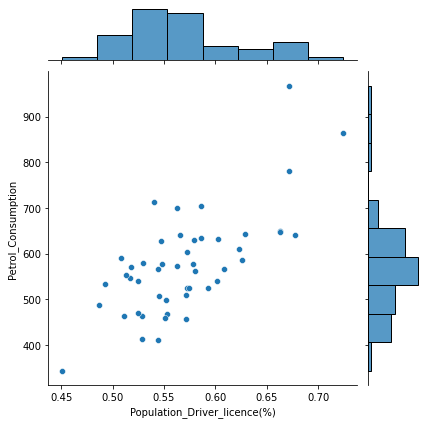

In [39]:
sns.jointplot(y='Petrol_Consumption',x='Population_Driver_licence(%)',data=dataset,kind='scatter')

In [10]:
X = dataset[['Petrol_tax','Average_income','Population_Driver_licence(%)']]#'Petrol_tax','Paved_Highways'
y = dataset['Petrol_Consumption']

In [40]:

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1.5
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [45]:
dataset.loc[detect_outliers(dataset,['Paved_Highways'])]

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=456)

In [12]:
X_train

,Petrol_tax,Average_income,Population_Driver_licence(%)
44,6.00,5215,0.672
35,6.58,3802,0.629
33,7.50,3357,0.547
38,8.50,3635,0.663
36,5.00,4045,0.566
0,9.00,3571,0.525
23,9.00,4258,0.517
3,7.50,4870,0.529
18,7.00,4716,0.724
12,7.00,4817,0.574


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-26.223314
Average_income,-0.068393
Population_Driver_licence(%),1514.581518


In [15]:
regressor.intercept_

206.27982750520925

In [16]:
y_pred = regressor.predict(X_train)
y_pred

array([710.07125245, 726.37348573, 608.48706474, 738.94206071,
       655.76828148, 521.19528145, 462.09290492, 477.74657559,
       796.73409075, 562.6392093 , 590.66626159, 498.90956123,
       550.17816254, 601.39793214, 315.78927748, 567.47100425,
       743.34951085, 519.56656158, 493.56499345, 666.5659294 ,
       571.7443728 , 584.38983702, 712.75690944, 647.30539768,
       492.80538006, 443.5194016 , 560.43583855, 454.17974087,
       586.30691819, 528.97071748, 672.48625447, 614.94210085,
       562.77445153, 641.92105367, 539.7134385 , 535.99370911,
       643.73539047, 623.50968607])

In [17]:
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
44,782,710.071252
35,644,726.373486
33,628,608.487065
38,648,738.942061
36,640,655.768281
0,541,521.195281
23,547,462.092905
3,414,477.746576
18,865,796.734091
12,525,562.639209


Text(0, 0.5, 'Residuals')

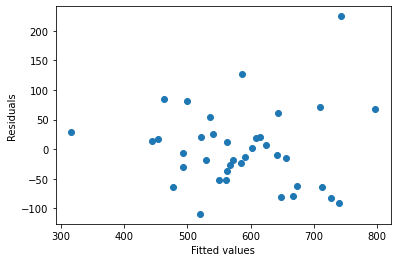

In [18]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [19]:
(y_train-y_pred).mean()

-1.1817447605273245e-13

C:\Users\vites.LAPTOP-CL7RLAUQ\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

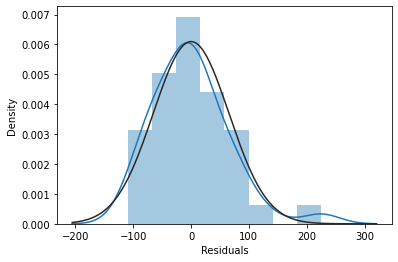

In [20]:
sns.distplot(y_train-y_pred , fit=norm);
plt.xlabel('Residuals')

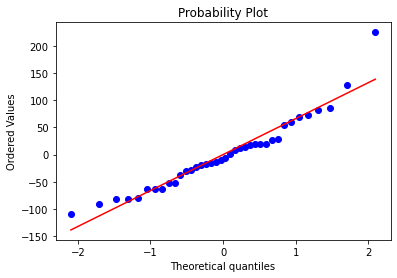

In [21]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [22]:
import statsmodels.api as sm

In [23]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [24]:
res = sm.OLS(y_train, X_train)
res.fit()

In [25]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              924.0
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                    2.28e-33
Time:                        08:09:30   Log-Likelihood:                         -213.47
No. Observations:                  38   AIC:                                      432.9
Df Residuals:                      35   BIC:                                      437.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -16.6652      9.131     -1.825      0.077     -35.202       1.872
Average_income                  -0.0604      0.020     -3.026      0.005      -0.101      -0.020
Population_Driver_licence(%)  1687.9507    146.018     11.560      0.000    1391.518    1984.384
==============================================================================
Omnibus:                        7.503   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.234
Skew:                           0.800   Prob(JB):                       0.0443
Kurtosis:                       4.174   Cond. No.                     5.56e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Model evaluation metrics - Regression problems

y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 51.06893871665552
Mean Squared Error: 3142.094242487706
Root Mean Squared Error: 56.05438646963952


In [27]:
# Model evaluation metrics - Regression problems

y_pred1 = res.fit().predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


Mean Absolute Error: 59.32972677688731
Mean Squared Error: 4041.7386121346435
Root Mean Squared Error: 63.574669579437405


In [28]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_test, y_pred1))


Mean Absolute percentage error: 10.660888785576432


In [30]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(y_train, y_pred))


Mean Absolute percentage error: 8.244782959878723


In [31]:
# Build a model keeping in mind the individual t tests

In [32]:
# Model evaluation metrics - Regression problems

y_pred = regressor.predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


Mean Absolute Error: 49.38412035712649
Mean Squared Error: 4281.662770770094
Root Mean Squared Error: 65.43441579757624


In [33]:
# Model evaluation metrics - Regression problems

y_pred = res.fit().predict(X_train)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 51.15854202200524
Mean Squared Error: 4436.433635464878
Root Mean Squared Error: 66.60655850188387
